In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer

In [2]:
df= pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Reviews']= df['Summary'] + ' ' + df['Text']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
 10  Reviews                 568427 non-null  object
dtypes: int64(5), object(6)
memory usage: 47.7+ MB


In [6]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Reviews                   27
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Reviews                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
 10  Reviews                 568411 non-null  object
dtypes: int64(5), object(6)
memory usage: 52.0+ MB


In [10]:
df[df.duplicated(subset= ['UserId', 'ProfileName', 'Time', 'Text'], keep= False)].shape

(232383, 11)

In [11]:
df[df['UserId'] == 'A395BORC6FGVXV']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Reviews
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...
136303,136304,B002Y7526Y,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...
544172,544173,B000U9WZ54,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...


In [12]:
df= df.drop_duplicates(subset= ['UserId', 'ProfileName', 'Time', 'Text'], keep= 'first')
df.shape

(393919, 11)

In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Reviews
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...


In [14]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [15]:
df['Sentiment']= np.where(df['Score']> 3, 1,0)

In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Reviews,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...,1


In [17]:
all_list= df['Reviews'].tolist()

In [18]:
tokenizer1= Tokenizer()
tokenizer1.fit_on_texts(all_list)
word_index1 = tokenizer1.word_index
print('Number of word without Stemming :', len(word_index1))

stemmer= PorterStemmer()
stemmed_words= [stemmer.stem(words) for words in word_index1.keys()]

tokenizer2= Tokenizer()
tokenizer2.fit_on_texts(stemmed_words)
word_index2= tokenizer2.word_index

print('Number of words after Stemming :', len(word_index2))

Number of word without Stemming : 139491
Number of words after Stemming : 106741


In [19]:
def preprocess_data(data):
    new_data= []
    for index, row in data.iterrows():
        test_split= row['Reviews'].split()
        stemmed_words= [stemmer.stem(word) for word in test_split]
        token_list= tokenizer2.texts_to_sequences([stemmed_words])[0]
        new_data.append([token_list, row['Sentiment']])
    return new_data

In [20]:
new_train_data= preprocess_data(df)
print(df['Reviews'][0])
print(new_train_data[0])

Good Quality Dog Food I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
[[1814, 3894, 3884, 3867, 3858, 569, 6549, 57, 3860, 6513, 1389, 1818, 3884, 3867, 53, 1810, 569, 1824, 6526, 1817, 3859, 1815, 3860, 1814, 6513, 53, 1013, 992, 123, 6514, 2156, 3864, 6514, 389, 3938, 1810, 6515, 1848, 6518, 2551, 18136, 1210, 1810, 6548, 66, 1811, 53, 3876, 3864], 1]


In [21]:
x= [rows[0] for rows in new_train_data]
y= [rows[1] for rows in new_train_data]

In [22]:
print(x[599])
print(y[599])

[6513, 3886, 6514, 1833, 18162, 1815, 6899, 1831, 1025, 3861, 3916, 6513, 1820, 1917, 1025, 3879, 21, 6805, 6524, 3861, 3863, 6514, 1054, 3859, 6526, 1810, 3858, 124, 6545, 4267, 6518, 574, 6899, 1025, 2012, 3859, 1815, 6513, 1853, 3858, 3888, 6532, 6514, 202, 634, 1044, 1810, 350, 18137, 990, 3860, 6567, 1833, 1335, 18140, 6521, 6540, 1828, 18188, 6541, 6521, 3858, 6593, 124, 6513, 2599, 1821, 1025, 18137, 6595, 35, 1810, 3862, 998, 3861, 350, 18137, 6611, 6553, 3863, 6514, 3921, 62, 1990]
1


In [23]:
length= []
for i in x:
    length.append(len(i))

In [24]:
print(len(x[0]))

49


In [25]:
np.quantile(length, [0.25,0.5,0.75,0.9])

array([ 32.,  52.,  88., 141.])

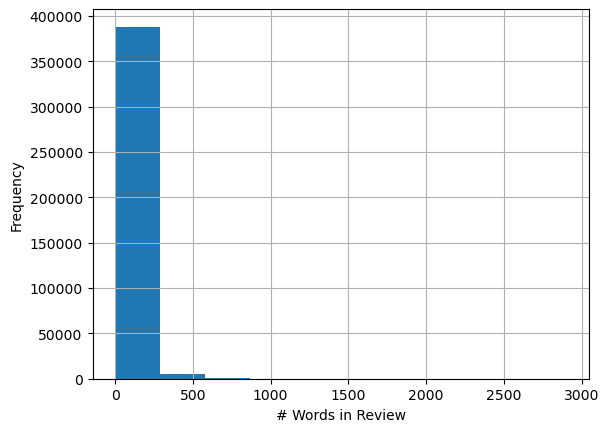

In [26]:
lengths= np.array(length)

plt.hist(lengths)
plt.ylabel("Frequency")
plt.xlabel("# Words in Review")
plt.grid()
plt.show()

In [27]:
from keras.utils import pad_sequences

In [141]:
x= pad_sequences(x, padding= 'post', maxlen= 60)

In [29]:
length= []
for i in x:
    length.append(len(i))

In [142]:
x= np.array(x)
y= np.array(y)

In [143]:
print(x.shape, y.shape)

(393919, 60) (393919,)


In [144]:
x[2]

array([ 6517,  1811,   216,  1810,  6515, 18136,  1045, 18152,  1068,
        1212,  1810, 18145,   307,   666,  1813,   595,  1810,  6515,
       18136,  6514,  1068,   365,  3860,  6520,  6536,  1810,  6528,
        3858, 18163,    32,  1811,   360,  6529,  6521,  3861,  1215,
        1813,  6513,  4129,  3860, 16563,  6513,  1810,  6513,  1811,
       18136,  6513,  1008,  6519,  3412, 23794, 18152,   630,  1819,
        6573,  6929,  1810,  6797,  3859,  6513])

In [33]:
#x_train= x[:295440]
#y_train= y[:295440]

#x_test= x[295440:]
#y_test= y[295440:]

In [189]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional
from keras.regularizers import L1L2
from keras.optimizers import Adadelta, AdamW

model= Sequential()
model.add(Embedding(input_dim= 20674, output_dim= 10))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(10, return_sequences= False)))
model.add(Dense(1, activation= 'sigmoid'))

In [190]:
model.compile(optimizer= Adam(learning_rate= 0.009), loss= 'binary_crossentropy', metrics= ['accuracy'])
model.fit(x, y, epochs= 8, validation_split= 0.35, batch_size= 7000)

Epoch 1/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7299 - loss: 0.5405 - val_accuracy: 0.8089 - val_loss: 0.4069
Epoch 2/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8283 - loss: 0.3776 - val_accuracy: 0.8655 - val_loss: 0.3082
Epoch 3/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8703 - loss: 0.2978 - val_accuracy: 0.8812 - val_loss: 0.2799
Epoch 4/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8869 - loss: 0.2650 - val_accuracy: 0.8853 - val_loss: 0.2700
Epoch 5/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8981 - loss: 0.2444 - val_accuracy: 0.8861 - val_loss: 0.2671
Epoch 6/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9062 - loss: 0.2284 - val_accuracy: 0.8914 - val_loss: 0.2637
Epoch 7/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9132 - loss: 0.2119 - val_accuracy: 0.8896 - val_loss: 0.2642
Epoch 8/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9181 - loss: 0.2027 - val_accuracy: 0.8873 - val_loss: 0.2720


In [186]:
history= model.history.history

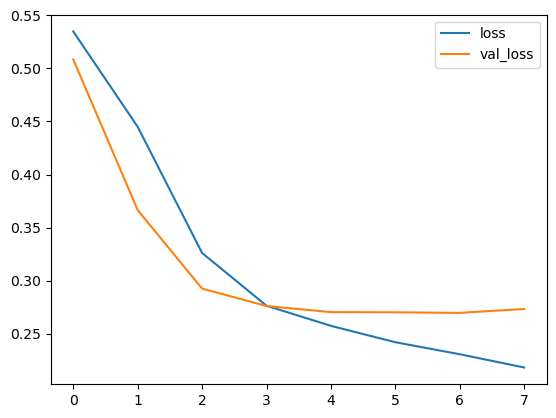

In [187]:
plt.plot(history['loss'], label= 'loss')
plt.plot(history['val_loss'], label= 'val_loss')
plt.legend(loc= 'best')
plt.show()

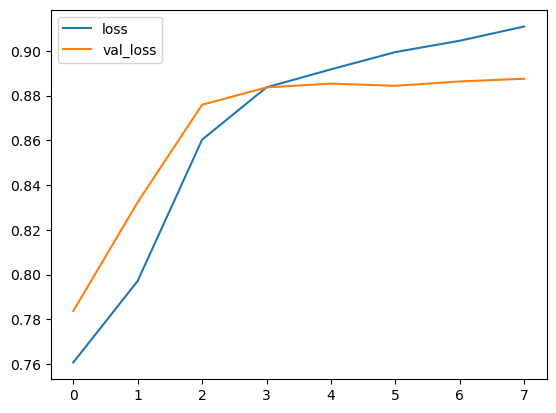

In [188]:
plt.plot(history['accuracy'], label= 'loss')
plt.plot(history['val_accuracy'], label= 'val_loss')
plt.legend(loc= 'best')
plt.show()